# Minimal Example of MDP Approach to Unified Planting and Harvesting Optimization
This is a minimal implementation of a Markov decision process formulation of the corn planting and harvesting model. This minimal example considers a limited set of fields which to produce corn undergo three different operations: planting, detasseling, and harvesting. Each operation is limited by its own daily capacity, operational time window, and growth degree unit (GDU). It is assumed that harvesting results in a reward of type yield which is a function of GDU at the time of harvest and the field's area. Below, a dynamic programming formulation of the problem is presented:

## Dynamic Programming Framework
**Assumptions**:

    1. Different fields are not batched together
    2. Only one hybrid type is considered
    3. Sequence of operations: Planting --> Detasseling --> Harvesting
    4. Unit of time for each decision epoch is a day
    5. One operation per day on each field
    6. It is assumed if the operation starts on a field, it will be finished by the end of the day
    7. Operations are non-preemptive
    8. GDU evolution is deterministic (by an average of 25 after planting)
    9. Volume yield of a field is a function of GDU at the time of harvest
    10. Fields are not prioritized
    
**Formulation**:

    - Decision epochs: Discrete times for decision making
$$t=0,\ldots,T.$$

    - State space: Summarizes the information neccessary for decision making
$$X:=\Big\{x_t=\{x^i_t\} \text{ where } x^i_t=(GDU^i_t, P^i_t, D^i_t, H^i_t) \text{ for all } i=1,\ldots,F, t=0,\ldots,T\Big\},$$ where $GDU^i_t$ denotes the GDU of field $i$ at time $t$, $P^i_t\in\{0, 1\}$ indicates whether field $i$ is planted by time $t$. $D^i_t$ and $H^i_t$ are also defined in a similar fashion.

    - Action space: Available decisions at each state and decision epoch
$$U_X(x_t):=\Big\{U_t=\{U_{i,j}\}\in\{0, 1\} \text{ for all } i=1,\ldots,F, j\in\{p, d, h\} \text{ subject to } LU_t\leq W \text{ for all }t=0,\ldots,T\Big\},$$ where $U_{i,j}=1$ if operation $j$ is assigned to field $i$. The action space is further restricted by linear constraints which can be viewed in matrix representation as $LU\leq W$. These constraints are:

        1. Daily resource capacities:
$$\sum_{i=1}^{F} U_{i,j}\leq r_j, \qquad\qquad \forall j\in\{p, d, h\},$$ where $r^j$ denotes the daily capacity of resources for operation $j$.

        2. Operational time windowns:
$$U_{i,j} t \leq \overline{T}_j, \qquad\qquad \forall j\in\{p, d, h\},$$
$$U_{i,j} \underline{T}_j \leq t, \qquad\qquad \forall j\in\{p, d, h\},$$ where $\overline{T}_j$ denotes the latest date acceptable for operation $j$ while $\underline{T}_j$ denotes the earliest date.

        3. GDU range limits
$$U_{i, j} GDU^i_t \leq \overline{GDU}_j, \qquad\qquad \forall j\in\{d, h\},$$
$$U_{i, j}\underline{GDU}_j \leq GDU^i_t, \qquad\qquad \forall j\in\{d, h\},$$ where $\overline{GDU}_j$ denotes the highest acceptable GDU for operation $j$ while $\underline{GDU}_j$ denotes the lowest. Also, not that no GDU limits are required for planting since unless a field is planted, its GDU is zero!

        4. Sequence of operations:
$$\begin{align*} &U_{i,p} P^i_t \leq 0, \qquad\qquad &\text { Do not plant field $i$ if already planted, i.e., } P^i_t=1,\\
&U_{i,d} D^i_t \leq 0, \qquad\qquad &\text { Do not detassel field $i$ if already detasseled, i.e., } D^i_t=1,\\
&U_{i,h} H^i_t \leq 0, \qquad\qquad &\text { Do not harvest field $i$ if already planted, i.e., } H^i_t=1,\end{align*}$$
and
$$\begin{align*} &U_{i,d}\leq P^i_t, \qquad\qquad &\text{ Do not detassel field $i$ if not planted,}\\
&U_{i,h} \leq D^i_t, \qquad\qquad &\text{ Do not harvest field $i$ if not detasseled.}\end{align*}$$

        5. One operation per day:
$$\sum_{j\in\{p, d, h\}} U_{i,j} \leq 1, \qquad\qquad \forall i=1,\ldots,F.$$ Note that this constraint is redundant since the sequence of operation ensures that different field operations are done sequentially.


    -Transition: Taking an action in any state results in a transition to another state
$$\begin{equation*} x_{t+1}=\eta\big(x_t, \pi(x_t)\big):=\left\{\begin{array}{l}GDU^i_{t+1}=25(P^i_t-H^i_t)+GDU^i_t\\
P^i_{t+1}=P^i_t+U_{i,p}\\
D^i_{t+1}=D^i_t+U_{i,d}\\
H^i_{t+1}=H^i_t+U_{i,h}
\end{array}\right. \qquad\qquad \forall i=1,\ldots,F,\end{equation*}$$ where $\eta(\cdot)$ is the transition function which identifies the future state $x_{t+1}$ as a function of the current state ${x_t}$ and the current decision $\pi(x_t)$. Note that $\pi(\cdot)$ denotes the decision rule, i.e., policy, which determines the action $U_t$. Also, notice that GDU grows by 25 each day after a field is planted at time $t$ and stops growing once it is harvested. In addition, state variable $P^i_t$ (similarly $D^i_t$ and $H^i_t$) will be equal to 1 once planting (detasseling or harvesting) is started and will remain 1 to the end of the horizon $T$.

    -Immediate reward: Once a field is harvested, an immediate reward of type yield is realized.
$$\begin{equation*} h\big(x_t, \pi(x_t)\big)=\left\{\begin{array}{ll}&0 &\text{ if } U_{i,p}=1,\\
&0 &\text{ if } U_{i,d}=1,\\
&Y(i, x_t) &\text{ if } U_{i,h}=1,
\end{array}\right. \qquad\qquad \forall i=1,\ldots,F,\end{equation*}$$ where $h(\cdot)$ is denotes the immediate reward of taking action $U_t$ under policy $\pi$ at state $x_t$. It ia assumed for this implementation that planting and detasseling do not result in any form of costs, rewards, or utilities. However, once a field is harvested, its yield, i.e., $Y(i, x_t)$, is a function of the area of the field (hence argument $i$) and GDU at the time of harvest (hence argument $x_t$ which contains information about GDU of field $i$ in the form of $GDU^i_t$).

**Optimality Equations**:

The optimal policy is given by solving the following cumulative reward to optimality:
$$V(x_0)=\max_{\pi\in\Pi} \sum_{t=0}^{T} \gamma^{T-t} h\big(x_t, \pi(x_t)\big)$$ where $x_0$ denotes the initial state at time $0$. In this implementation, $x_0=[0]$ which is equivalent to assuming that none of the fields are planted at time $0$. Note that $\Pi$ is the set of admissible policies, and $\gamma$ is the discount factor which is smaller as we reach the end of horizon. In this implementation, $\gamma$ is assumed to be 1.

The recursion to solve this problem is based on Bellman's principle of optimality:

$$\begin{equation*}\begin{array}{ll}&V(x_t)=\max_{U_t\in U_X(x_t)} h(x_t, U_t) + V(x_{t+1}), \qquad\qquad &\forall t=0,\ldots,T,\\
&V(x_{T+1})=0, & \end{array}\end{equation*} $$ where the final reward at time $T+1$ is equal to zero since no operation will be allowed after the end of the horizon.

## Backward Induction Code

Since the reward at the end of the horizon is known, the code belwo recursively calculates $V(x_t)$ by evaluating $V(x_{t+1})$. The number of fields are limited to 4 for this example. After a solution is found, a Gantt chart is ploted to visualize the operations schedule.

In [ ]:
#import libraries
import numpy as np
import itertools
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#install memoization if necessary
#!pip install memoization
from memoization import cached

Below, fields are defined. Area of each field is given. It is assumed that the whole operation from planting to harvesting is done within a 60 day period, and earliest and latest acceptable dates as well as lowest and highest acceptable GDUs for each operation are given. 

In [ ]:
#define the parameter space
fields=[1, 2, 3, 4]
#fields volumes
area_f=[10, 20, 15, 20]

#horizon
T=60

#earliest & latest possible planting time
EPT=0
LPT=5

#earliest & latest detasseling time
EDT=30
LDT=33

#earliest & latest harvesting time
EHT=58
LHT=60

#lowest & highest detasseling GDU
LgduD=750
HgduD=1000

#lowest & highest harvesting GDU
LgduH=1400
HgduH=1500

The state vector is assumed to be constructed of four list elements, i.e., x=[gdu, p, d, h] where, for example, ```len(gdu)==len(fields)```. Below, all permuations of 0 and 1 for $U_t=\{U_{i,j}\}, \forall i=1,\ldots,F, j\in\{p,d,h\}$ are produced at first. Then, infeasible actions are filtered based on state $x_t$ at time $t$ according to the constraints defined above.

In [7]:
#define the action space
def action(x, t):
    #decompose x
    gdu=x[0]
    p=x[1]
    d=x[2]
    h=x[3]
    
    #initialize a set of potential actions. This is the permuation of all 0s and 1s.
    u_p_lst=list(itertools.product([0,1],repeat=4))
    u_d_lst=list(itertools.product([0,1],repeat=4))
    u_h_lst=list(itertools.product([0,1],repeat=4))
    
    #1. Daily resource capacities:
    u_p_lst=[u_p for u_p in u_p_lst if sum(u_p)<=3] #planting reources <=3
    u_d_lst=[u_d for u_d in u_d_lst if sum(u_d)<=2] #detasseling resources <=2
    u_h_lst=[u_h for u_h in u_h_lst if sum(u_h)<=2] #harvesting resources <=2
    
    #2. Operational time windowns:
    u_p_lst=[u_p for u_p in u_p_lst if np.all(np.multiply(u_p, t)<= LPT)] #do not plant later than LPT
    u_p_lst=[u_p for u_p in u_p_lst if np.all(np.multiply(u_p, EPT)<= t)] #do not plant earlier than EPT
    
    u_d_lst=[u_d for u_d in u_d_lst if np.all(np.multiply(u_d, t)<= LDT)] #do not detassel later than LPT
    u_d_lst=[u_d for u_d in u_d_lst if np.all(np.multiply(u_d, EDT)<= t)] #do not detassel earlier than EPT
    
    u_h_lst=[u_h for u_h in u_h_lst if np.all(np.multiply(u_h, t)<= LHT)] #do not detassel later than LPT
    u_h_lst=[u_h for u_h in u_h_lst if np.all(np.multiply(u_h, EHT)<= t)] #do not detassel earlier than EPT
    
    #3. GDU range limits:
    u_d_lst=[u_d for u_d in u_d_lst if np.all(np.multiply(u_d, gdu)<= HgduD)] #do not detassel later than LPT
    u_d_lst=[u_d for u_d in u_d_lst if np.all(np.multiply(u_d, LgduD)<= gdu)] #do not detassel earlier than EPT
    
    u_h_lst=[u_h for u_h in u_h_lst if np.all(np.multiply(u_h, gdu)<= HgduH)] #do not detassel later than LPT
    u_h_lst=[u_h for u_h in u_h_lst if np.all(np.multiply(u_h, LgduH)<= gdu)] #do not detassel earlier than EPT
    
    #4. Sequence of operations:
    u_p_lst=[u_p for u_p in u_p_lst if np.all(np.multiply(u_p, p)<= 0)] #do not plant if already planted
    u_d_lst=[u_d for u_d in u_d_lst if np.all(np.multiply(u_d, d)<= 0)] #do not detassel if already detasseled
    u_h_lst=[u_h for u_h in u_h_lst if np.all(np.multiply(u_h, h)<= 0)] #do not harvest if already harvested
    
    u_d_lst=[u_d for u_d in u_d_lst if np.all(np.array(u_d)<=np.array(p))] #do not detassel if not planted
    u_h_lst=[u_h for u_h in u_h_lst if np.all(np.array(u_h)<=np.array(d))] #do not harvest if not detasseled
    
    #5. One operation per day:
    ##maybe not neccessary because operational sequence constraints do not allow multiple operation in one day
    
    return[u_p_lst, u_d_lst, u_h_lst]

Below, the transition function is defined.

In [6]:
#define transition function
def transition(x, u):
    #decompose x, u
    gdu=x[0]
    p=x[1]
    d=x[2]
    h=x[3]
    
    u=[list(i) for i in u] #this is necessary because u is of the form tuple
    u_p=u[0]
    u_d=u[1]
    u_h=u[2]
    
    #transition
    gdu=list(np.array(gdu)+25*(np.array(p)-np.array(h)))
    p=list(np.array(p)+np.array(u_p))
    d=list(np.array(d)+np.array(u_d))
    h=list(np.array(h)+np.array(u_h))
    
    return [gdu, p, d, h]

Below, the immediate reward function is defined. It is assumed that maximum yield is only achieved at harvest GDU=1450. In addition, for every 1 unit of GDU difference at the time of harvest, 0.001 of yield is lost.

In [8]:
#define reward
def reward(x, u):
    #decompose x, u
    gdu=x[0]
    p=x[1]
    d=x[2]
    h=x[3]
    
    u=[list(i) for i in u] #this is necessary because u is of the form tuple
    u_p=u[0]
    u_d=u[1]
    u_h=u[2]
    
    reward=sum(np.multiply(np.multiply(area_f, 1-abs(np.array(gdu)-1450)/1000), u_h))
    
    return reward

Below, the Bellman's principle of optimiality is implemented. Here, the $V(x_t)$ is kept in memory, ```@cached(max_size=None)``` for every $x_t$ to reduce the number of calculations in the recursion. 

In [9]:
#Bellman's principle
@cached(max_size=None) #memoization
def value_function(x, t):
    #decompose s
    gdu=x[0]
    p=x[1]
    d=x[2]
    h=x[3]
    
    if (t==T+1):
        return 0
    else:
        #get the set of all available actions [(u_p1), (u_d), (u_h)]
        u_set=action(x, t)
        u_set=list(itertools.product(u_set[0], u_set[1], u_set[2]))
        u_set=[list(i) for i in u_set]
        
        return max([reward(x, u)+value_function(transition(x, u), t+1) for u in u_set])

Here, $x_0=[0]$ is defined, $t=0$ is set and $V(x_0)$ is evaluated.

In [10]:
#main recursion

#define state variable
gdu=[0,0,0,0]
p=[0,0,0,0]
d=[0,0,0,0]
h=[0,0,0,0]
x=[gdu, p, d, h]
t=0

v_star=value_function(x, t)

In [11]:
#optimal value function
v_star

65.0

Here, the optimal action at every time is extracted based on the optimal value of $V(x_t)$.

In [12]:
policy=[]
state_progression=[]
gdu=[0,0,0,0]
p=[0,0,0,0]
d=[0,0,0,0]
h=[0,0,0,0]
x=[gdu, p, d, h]
t=0
for t in range(0, T+1):
    u_set=action(x, t)
    u_set=list(itertools.product(u_set[0], u_set[1], u_set[2]))
    u_set=[list(i) for i in u_set]
    new_value=[]
    new_x=[]
    for u in u_set:
        x_temp=transition(x, u)
        new_x.append(x_temp)
        new_value.append(reward(x, u)+value_function(x_temp, t+1))
    policy.append(u_set[np.argmax(new_value)])
    x=new_x[np.argmax(new_value)]
    state_progression.append(x)
#policy.reverse()

In [13]:
policy
#[(u_p), (u_d), (u_h)]

[[(0, 0, 1, 1), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(1, 1, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)],
 [(0, 0, 0

In [14]:
state_progression
#[[gdu], [p], [d], [h]]

[[[0, 0, 0, 0], [0, 0, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[0, 0, 25, 25], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[25, 25, 50, 50], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[50, 50, 75, 75], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[75, 75, 100, 100], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[100, 100, 125, 125], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[125, 125, 150, 150], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[150, 150, 175, 175], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[175, 175, 200, 200], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[200, 200, 225, 225], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[225, 225, 250, 250], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[250, 250, 275, 275], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[275, 275, 300, 300], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[300, 300, 325, 325], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[325, 325, 350, 350], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[350, 350, 375, 3

In [15]:
def gantt_chart(policy):
    #figure "gnt" 
    fig, gnt = plt.subplots()

    #setting axis limits 
    gnt.set_ylim(0, len(fields)+1) 
    gnt.set_xlim(0, T+1+1)

    #setting labels for x-axis and y-axis 
    gnt.set_xlabel('Days') 
    gnt.set_ylabel('Fields')

    #ticks and labels on y-axis 
    gnt.set_yticks(fields)
    gnt.set_yticklabels(['1', '2', '3', '4'])

    #setting graph attribute 
    gnt.grid(True)

    for i in range(0, len(policy)):
        u_p=policy[i][0]
        u_d=policy[i][1]
        u_h=policy[i][2]
        if (np.any(np.array(u_p)!=0)):
            for j in range(0, len(fields)):
                if (u_p[j]==1):
                    gnt.broken_barh([(i, 1)], (j, 1), facecolors=('tab:green'))
        if (np.any(np.array(u_d)!=0)):
            for j in range(0, len(F)):
                if (u_d[j]==1):
                    gnt.broken_barh([(i, 1)], (j, 1), facecolors=('tab:orange'))
        if (np.any(np.array(u_h)!=0)):
            for j in range(0, len(F)):
                if (u_h[j]==1):
                    gnt.broken_barh([(i, 1)], (j, 1), facecolors=('tab:blue'))
    return fig, gnt

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Days', ylabel='Fields'>)

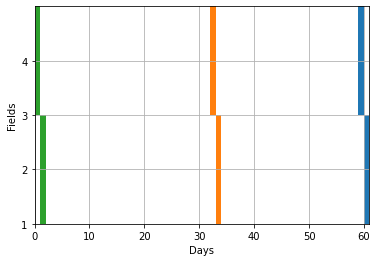

In [17]:
gantt_chart(policy)